# Nutrition

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

## Raw Data

In [327]:
DATA_PATH_AVG = '../data/input/nutrients_avg.xlsx'

def process_data(data_path):
    df = pd.read_excel(data_path)
    time_column = df['Time']
    df_no_time = df.drop(columns='Time')
    X = df_no_time.to_numpy()
    sorted_data = np.sort(X, axis=0)[::-1]
    maxes = np.max(sorted_data, axis=0)
    normalized_data = sorted_data / maxes
    data_df = pd.DataFrame(normalized_data, columns=df_no_time.columns)
    data_df['Time'] = time_column.sort_values(ascending=True).reset_index(drop=True)
    return data_df, maxes

df_data_normalized, maxes = process_data(DATA_PATH_AVG)

df_data_normalized.head()

,B,Ca,Cu,Fe,K,Mg,Mn,Na,P,Zn,N,Time
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,0.975676,0.967033,0.757225,0.926220,0.984881,0.997118,0.963664,0.982721,0.964880,0.885609,0.947009,7
2,0.965541,0.958242,0.739884,0.925085,0.876890,0.981268,0.918244,0.906407,0.892791,0.833948,0.902171,14
3,0.864865,0.901099,0.624277,0.872872,0.280562,0.881844,0.438304,0.410367,0.510166,0.321033,0.631666,21


In [328]:
FERTILIZER_PATH = '../data/input/fertilizer.xlsx'

df_fertilizer = pd.read_excel(FERTILIZER_PATH)
df_fertilizer_normalized = df_fertilizer/maxes
df_fertilizer_normalized.head()

,B,Ca,Cu,Fe,K,Mg,Mn,Na,P,Zn,N
0,0.000210,0.000094,0.264246,0.001538,0.000125,0.000292,0.036727,0.000096,0.000286,0.021631,0.000050
1,0.032856,0.000095,0.181090,0.005791,0.000107,0.000319,0.010258,0.000165,0.000171,0.030520,0.000052
2,0.039601,0.000026,0.245943,0.003782,0.000117,0.000283,0.008109,0.000259,0.000115,0.180471,0.000008


## Data Preparation

In [338]:
from scipy.interpolate import interp1d

def interpolate_data(data_df, num_points=500, kind='cubic'):
    data = data_df.to_numpy()
    x_original = np.arange(data.shape[0])  # Original index positions
    x_interp = np.linspace(0, data.shape[0] - 1, num_points)  # Interpolation index positions
    
    # Initialize an array to store interpolated data
    Y_interp = np.zeros((num_points, data.shape[1]))
    
    # Interpolate each column
    for col in range(data.shape[1]):
        f = interp1d(x_original, data[:, col], kind=kind)  # Use the specified interpolation method
        Y_interp[:, col] = f(x_interp)

    # Create a DataFrame for the interpolated data
    interpolated_df = pd.DataFrame(Y_interp, columns=data_df.columns)

    return interpolated_df


df_data_normalized_interp = interpolate_data(df_data_normalized, num_points=21, kind='linear')

df_data_normalized_interp.head(n=21)

,B,Ca,Cu,Fe,K,Mg,Mn,Na,P,Zn,N,Time
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00
1,0.996351,0.995055,0.963584,0.988933,0.997732,0.999568,0.994550,0.997408,0.994732,0.982841,0.992051,1.05
2,0.992703,0.990110,0.927168,0.977866,0.995464,0.999135,0.989099,0.994816,0.989464,0.965683,0.984103,2.10
3,0.989054,0.985165,0.890751,0.966799,0.993197,0.998703,0.983649,0.992225,0.984196,0.948524,0.976154,3.15
4,0.985405,0.980220,0.854335,0.955732,0.990929,0.998271,0.978198,0.989633,0.978928,0.931365,0.968205,4.20
5,0.981757,0.975275,0.817919,0.944665,0.988661,0.997839,0.972748,0.987041,0.973660,0.914207,0.960256,5.25
6,0.978108,0.970330,0.781503,0.933598,0.986393,0.997406,0.967298,0.984449,0.968392,0.897048,0.952308,6.30
7,0.975169,0.966593,0.756358,0.926163,0.979482,0.996326,0.961393,0.978906,0.961275,0.883026,0.944767,7.35
8,0.973649,0.965275,0.753757,0.925993,0.963283,0.993948,0.954580,0.967459,0.950462,0.875277,0.938041,8.40
9,0.972128,0.963956,0.751156,0.925823,0.947084,0.991571,0.947767,0.956012,0.939649,0.867528,0.931315,9.45


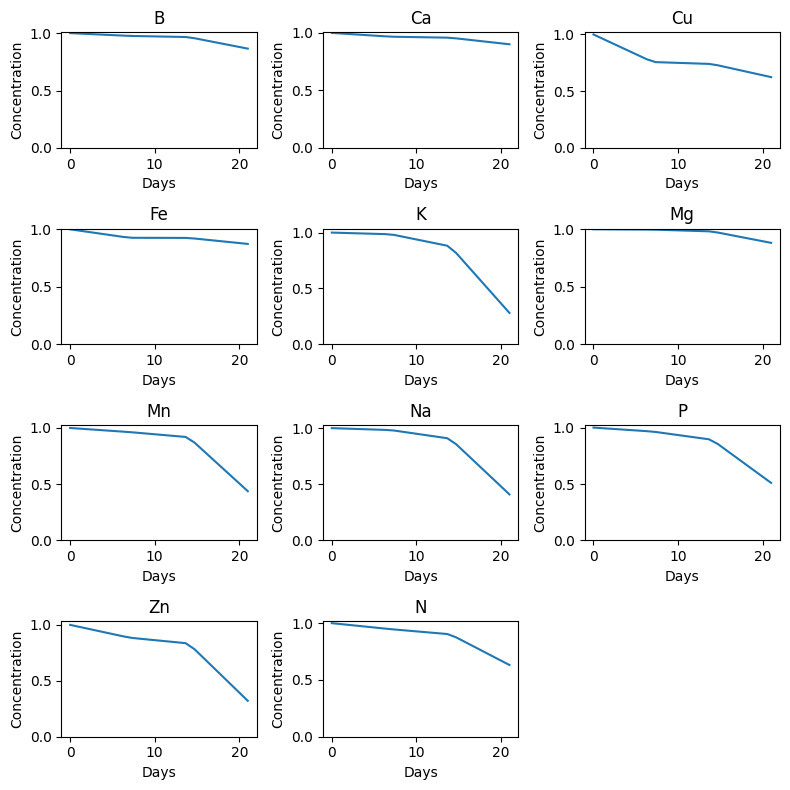

In [339]:
import matplotlib.pyplot as plt

def plot_curves(data_df):
    # Extract the 'Time' column and other data
    time = data_df['Time']
    y = data_df.drop(columns='Time').to_numpy()  # Drop 'Time' to get only the data for plotting
    
    num_cols = y.shape[1]  # Number of columns to plot
    num_rows = (num_cols + 2) // 3  # Calculate number of rows needed for subplots
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(8, 2 * num_rows))
    axes = axes.flatten()

    # Plot each column against the 'Time' column
    for i in range(num_cols):
        axes[i].plot(time, y[:, i])
        axes[i].set_ylim([0, None])
        axes[i].set_title(f'{data_df.columns[i]}')  # Optional: Set title for each subplot
        axes[i].set_xlabel('Days')
        axes[i].set_ylabel('Concentration')

    # Hide any unused subplots
    for j in range(num_cols, len(axes)):
        axes[j].axis('off')  # Hide unused subplots

    plt.tight_layout()
    plt.show()

# Example usage:
plot_curves(df_data_normalized_interp)


In [331]:
# def absolute_plant_uptake_from_rate(x_interp, plant_uptake_rate, start, end):
#     start_index = np.argmin(np.abs(x_interp - start)) # find the best index
#     end_index = np.argmin(np.abs(x_interp - end))
#     return np.sum(plant_uptake_rate[start_index:end_index,:],axis=0)/(end_index-start_index)

# absolute_uptake = absolute_plant_uptake_from_rate(x_interp, plant_uptake_rate, 0,1)
# print(f"{absolute_uptake = }")

In [344]:
def absolute_plant_uptake_during_interval(data_df, start, end):
    # Extract the 'Time' column
    time = data_df['Time'].to_numpy()
    
    # Find the nearest indices for the start and end times
    start_index = np.argmin(np.abs(time - start))
    end_index = np.argmin(np.abs(time - end))
    
    # Calculate uptake as the negative of the nutrient change in solution
    uptake = -(data_df.iloc[end_index, 0:-1] - data_df.iloc[start_index, 0:-1])  # Skip 'Time' column

    return uptake

uptake = absolute_plant_uptake_during_interval(df_data_normalized_interp, 0,21)

uptake.to_numpy()

array([0.13513514, 0.0989011 , 0.37572254, 0.12712826, 0.71943844,
       0.11815562, 0.56169569, 0.58963283, 0.48983364, 0.67896679,
       0.36833377])

## Optimize

Consider a single time intervall $I = [t_0, T]$.

Unsing the model of the plant uptake we have obtained the the target nutrient concentration should be idealy $\vec T$.

Let us optimize the minimal total amount of fertilizer to reach the target under the constraint that the plant does not experience any deficite of nutrients.

$L = \min(|\vec{T} - (u_1 \vec{F}_1 + u_2 \vec{F}_2 + u_3 \vec{F}_3|)$

Constrain: $\vec{T} - (u_1 \vec{F}_1 + u_2 \vec{F}_2 + u_3 \vec{F}_3) \ge 0$

**Comments:**

1. Since the concentration have different scales, it might be reasonable to scale (transfrom) them using sklearn MaxMinScaler or StandartScaler.
Afterwards don't forget to apply the inverse transform to get correct values!

In [351]:
def nutrients(param, fertilizer, target):
    parameter = np.array(param).reshape(fertilizer.shape[0],1)
    weighted_fertilizers = np.multiply(fertilizer,parameter)
    total_fertilizers = weighted_fertilizers.sum(axis=0)
    value = target - total_fertilizers
    return value

def objective_function(param, fertilizer, target):
    parameter = np.array(param).reshape(fertilizer.shape[0],1)
    # print(f"{parameter.shape=}")
    # print(f"{fertilizer.shape=}")
    weighted_fertilizers = np.multiply(fertilizer,parameter)
    # print(f"{weighted_fertilizers.shape}")
    total_fertilizers = weighted_fertilizers.sum(axis=0)
    # print(f"{total_fertilizers.shape}")
    value = target - total_fertilizers
    return np.sum(np.abs(value))


def constraint_function(param, fertilizer, target):
    # Reshape the parameter vector and compute weighted fertilizers
    parameter = np.array(param).reshape(fertilizer.shape[0], 1)
    weighted_fertilizers = np.multiply(fertilizer, parameter)
    # Sum the weighted fertilizers to get the total contribution for each nutrient
    total_fertilizers = weighted_fertilizers.sum(axis=0)
    # Calculate the difference between the target and total fertilizers for each nutrient
    value = target - total_fertilizers
    # Return the difference (this will ensure SLSQP enforces the constraint for each nutrient)
    return value


def optimize(fertilizer, target, constraint_function):
    # Initial guess for the parameters, one for each row (fertilizer) in the fertilizer DataFrame
    initial_guess = np.zeros(fertilizer.shape[0])
    
    # Define bounds for each parameter (non-negative values)
    bounds = [(0, None) for _ in range(fertilizer.shape[0])]
    
    # Define the constraint dictionary using the provided constraint function
    constraints = {'type': 'ineq', 'fun': constraint_function, 'args': (fertilizer, target)}
    
    # Call the optimizer
    result = minimize(
        objective_function,
        initial_guess,
        args=(fertilizer, target),
        bounds=bounds,
        constraints=constraints,
        method='SLSQP'
    )
    return result  # Return optimized parameters and minimized objective value


for i in range(df_data_normalized_interp.drop(columns='Time').to_numpy().shape[0]):
    result = optimize(
        df_fertilizer_normalized.to_numpy(),
        df_data_normalized_interp.drop(columns='Time').to_numpy()[i],
        constraint_function
    )
    print(f"{type(result)}")
    if result.success:
        print("Optimization was successful!")
    else:
        print("Optimization failed. Reason:", result.message)
    # print("Optimized parameters:", result.x)
    # print("Minimized objective function value:", result.fun)

    # Calculate the nutrient values using the optimized parameters
    nutrient_values = nutrients(result.x, df_fertilizer_normalized.to_numpy(), df_data_normalized_interp.drop(columns='Time').to_numpy()[i])
    print("Constraint values:", nutrient_values)



<class 'scipy.optimize._optimize.OptimizeResult'>
Optimization was successful!
Constraint values: [8.38984808e-01 9.99892410e-01 1.22571087e-09 9.84621070e-01
 9.99523751e-01 9.98848428e-01 9.67030422e-01 9.98948127e-01
 9.99532650e-01 2.66207260e-01 9.99967411e-01]
<class 'scipy.optimize._optimize.OptimizeResult'>
Optimization was successful!
Constraint values: [ 8.88839664e-01  9.94796205e-01 -2.07873763e-09  9.74183079e-01
  9.97253726e-01  9.98362071e-01  9.24551928e-01  9.96641002e-01
  9.93999502e-01  5.86523703e-01  9.91923529e-01]
<class 'scipy.optimize._optimize.OptimizeResult'>
Optimization was successful!
Constraint values: [ 8.43414629e-01  9.90010136e-01 -2.48376764e-10  9.63607215e-01
  9.95022800e-01  9.98067746e-01  9.58530842e-01  9.93841152e-01
  9.89030644e-01  2.85333780e-01  9.84072374e-01]
<class 'scipy.optimize._optimize.OptimizeResult'>
Optimization was successful!
Constraint values: [8.89351156e-01 9.84926279e-01 3.72887721e-09 9.53149592e-01
 9.92754282e-01 9.

In [369]:

uptake = absolute_plant_uptake_during_interval(df_data_normalized_interp, 1,2)
print(f"{uptake}")
result = optimize(
    df_fertilizer_normalized.to_numpy(),
    uptake.to_numpy(),
    constraint_function
)

print("---------------------------------------------------------------------")
if result.success:
    print("Optimization was successful!")
else:
    print("Optimization failed. Reason:", result.message)

nutrient_values = nutrients(result.x, df_fertilizer_normalized.to_numpy(), uptake.to_numpy())
print("Scaled constraint values:", nutrient_values)
print("constraint values:", nutrient_values*maxes)


B     0.003649
Ca    0.004945
Cu    0.036416
Fe    0.011067
K     0.002268
Mg    0.000432
Mn    0.005450
Na    0.002592
P     0.005268
Zn    0.017159
N     0.007949
dtype: float64
---------------------------------------------------------------------
Optimization was successful!
Scaled constraint values: [1.55361075e-09 4.93730376e-03 1.01664864e-08 1.06260103e-02
 2.25040807e-03 3.90446029e-04 2.75258826e-03 2.56322370e-03
 5.24205038e-03 7.18489974e-09 7.94509771e-03]
constraint values: [3.83223985e-10 3.74412202e-01 2.93133690e-10 1.56025251e-02
 1.73656490e-01 9.03231815e-03 6.06028182e-04 5.93386286e-02
 9.45316418e-02 3.24517971e-10 1.50579144e+00]


## Iterative process

The next step is to calculate a schedule how to fertilize the plants.
As input we give the time intervall that we want to attent to the plants.
As a ouput we want the amount of each fertilizer we have to add for each time.

Comments:
- additional statistic would be nice
- some plots would be also nice

In [334]:
def calculate_fertilization_schedule(data_path, time_intervall_days, c_fertilizer1, c_fertilizer2, c_fertilizer3):
    
    # read and normalize data
    data, maxes = process_data(data_path=data_path)
    
    # normalize fartilizer
    norm_c_fertilizer1 = c_fertilizer1/maxes
    norm_c_fertilizer2 = c_fertilizer2/maxes
    norm_c_fertilizer3 = c_fertilizer3/maxes

    # interpolate the data
    x_interp, Y_interp = interpolate_data(data, num_points=4*7, kind='linear')
    # calculate the uptake of each nutrient of the plant
    # x_interp, plant_uptake_rate = calculate_nutrient_uptake_rate(x_interp, Y_interp, num_interp_points=500)
    # calculate 
    time_intervall_week = time_intervall_days/7
    num_fertilization_events = int(x_interp[-1] // time_intervall_week)

    residual = 0
    results = dict()

    # build schedule
    for i in range(num_fertilization_events):
        
        start = i*time_intervall_week
        end = (i+1)*time_intervall_week

        c_target_without_residuals = absolute_plant_uptake_during_interval(x_interp=x_interp, Y_interp=Y_interp, start=start ,end=end)

        # calculate the target considering residual (excess) nutrients in the solution
        c_target = np.abs(c_target_without_residuals - residual)

        # Define the constraint
        constraint = {
            'type': 'ineq',  # 'ineq' means the constraint function must return >= 0
            'fun': constraint_function,
            'args': (norm_c_fertilizer1, norm_c_fertilizer2, norm_c_fertilizer3, c_target)
        }

        # optimize 
        a_opt, b_opt, c_opt, minimized_value = optimize(norm_c_fertilizer1, norm_c_fertilizer2, norm_c_fertilizer3, c_target, constraint)
        
        params_opt = (a_opt, b_opt, c_opt)
        
        # calculate the excess nutrient after time period
        residual = nutrients(params_opt, norm_c_fertilizer1, norm_c_fertilizer2, norm_c_fertilizer3, c_target)

        # store the results
        results[f"{int(start*7)}"] = {'f1' : a_opt,
                                     'f2' : b_opt,
                                     'f3' : c_opt,
                                     'excess_1': residual[0],
                                     'excess_2': residual[1],
                                     'excess_3': residual[2],
                                     'excess_4': residual[3],
                                     'excess_5': residual[4],
                                     'excess_6': residual[5],
                                     'excess_7': residual[6],
                                     'excess_8': residual[7],
                                     'excess_9': residual[8],
                                     'excess_10': residual[9],
                                     'excess_11': residual[10],
                                    #  'excess' : (residual*maxes).round(3),
                                    #  'excess_normalized' : (residual).round(3),
                                     'objective_function': minimized_value}
    df = pd.DataFrame(results).T
    return df

c_fertilizer1 = np.abs(np.random.sample(11))*0.01
c_fertilizer2 = np.abs(np.random.sample(11))*0.01
c_fertilizer3 = np.abs(np.random.sample(11))*0.01
   

results = calculate_fertilization_schedule(data_path=DATA_PATH_AVG, time_intervall_days=1, c_fertilizer1=c_fertilizer1, c_fertilizer2=c_fertilizer2, c_fertilizer3=c_fertilizer3)

results.head()

ValueError: too many values to unpack (expected 2)

In [119]:
c_fertilizer1 = np.abs(np.random.sample(11*3).reshape(11,3))*0.01

# Reshape c_fertilizer1 to (1, 11) so that it matches the number of columns
c_fertilizer1 = c_fertilizer1.reshape(3, -1)

# Now create the DataFrame
df_fertilizer1 = pd.DataFrame(c_fertilizer1, columns=df.drop(columns='Time').columns)

df_fertilizer1.to_excel('../data/input/fertilizer.xlsx',index=None)

## Analyse results

In [129]:
def plot_excess_stacked(df_transposed):
    excess_labels = [f'Excess {i}' for i in range(len(df_transposed['excess'].iloc[0]))]
    days = df_transposed.index
    day_array = [int(day.split('_')[0])  for day in days]
    x = np.arange(len(days))  # the label locations for days
    width = 0.35  # The width of the bars

    # Plot stacked bar chart
    plt.figure(figsize=(10, 6))

    # Initialize the bottom of the stack
    bottom = np.zeros(len(days))

    # Plot each excess group on top of the previous one (stacked)
    for i, label in enumerate(excess_labels):
        excess_values = [df_transposed.loc[day, 'excess'][i] for day in df_transposed.index]
        plt.bar(x, excess_values, width=width, label=label, bottom=bottom)
        
        # Update the bottom to include the current excess values
        bottom += excess_values

    # Adding gridlines
    plt.grid(axis='y', which='both', linestyle='--', linewidth=0.7, color='grey')

    # Labeling
    plt.xlabel('Days')
    plt.ylabel('Excess Value')
    plt.title('Stacked Excess Values for Different Days')

    # Adjust x-ticks to display numeric labels (1, 2, 3, ...) instead of day_0, day_7, etc.
    # plt.xticks(x, labels=[i for i in range(len(days))])
    x_labels = [day+day_array[1] for day in day_array]
    plt.xticks(x, labels=x_labels)

    # Add legend and show the plot
    plt.legend(title='Excess Groups')
    plt.tight_layout()
    plt.show()

In [ ]:
plot_excess_stacked(results)

In [ ]:
results['objective_function']